In [1]:
import torch
import numpy as np
import sympy as sp
import os, sys
import symbolicregression
import requests
import matplotlib.pyplot as plt
from IPython.display import display

/home/philipp/anaconda3/envs/endToEndSR/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [69]:
os.path.isfile(model_path)

True

In [2]:
model_path = "model.pt" 
try:
    if not os.path.isfile(model_path): 
        url = "https://dl.fbaipublicfiles.com/symbolicregression/model1.pt"
        r = requests.get(url, allow_redirects=True)
        open(model_path, 'wb').write(r.content)
    if not torch.cuda.is_available():
        model = torch.load(model_path, map_location=torch.device('cpu'))
    else:
        model = torch.load(model_path)
        model = model.cuda()
    print(model.device)
    print("Model successfully loaded!")

except Exception as e:
    print("ERROR: model not loaded! path was: {}".format(model_path))
    print(e)    

cwd: /home/philipp/projects/phyiscalLawLearning/symbolicregression
cuda:0
Model successfully loaded!


In [3]:
est = symbolicregression.model.SymbolicTransformerRegressor(
                        model=model,
                        max_input_points=200,
                        n_trees_to_refine=100,
                        rescale=True
                        )

In [63]:
##Example of data
x = np.random.randn(100, 1)
# x = np.arange(0,10,0.1).reshape(-1,1)
y = np.cos(2*np.pi*x[:,0]) # +x[:,1]**2


In [64]:
x.shape

(100, 1)

In [65]:
est.fit(x,y)
replace_ops = {"add": "+", "mul": "*", "sub": "-", "pow": "**", "inv": "1/"}
model_str = est.retrieve_tree(with_infos=True)["relabed_predicted_tree"].infix()
for op,replace_op in replace_ops.items():
    model_str = model_str.replace(op,replace_op)
display(sp.parse_expr(model_str))

1.0*cos(6.35913684854485*x_0 - 0.015199903640178) + 0.001

In [66]:
y_pred = est.predict(x)

In [67]:
np.linalg.norm(y_pred - y) / len(y)

0.005183158217812671

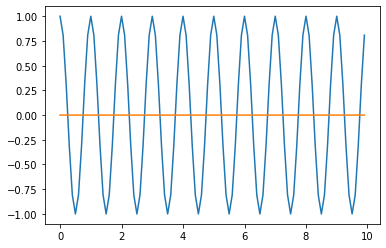

In [62]:
index = np.argsort(x[:,0])
plt.plot(x[index], y[index])
plt.plot(x[index], y_pred[index])